<a href="https://colab.research.google.com/github/ericakitano/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**



- **Author:** Erica Kitano

## **Project Overview**


## **Load and Inspect Data**


### Load Data

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import pandas as pd

In [103]:
filename = '/content/drive/MyDrive/Colab Notebooks/Raw Data Files/Project/sales_predictions.csv'
df = pd.read_csv(filename)

### Inspect Data

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [105]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **Clean Data**


In [106]:
#1. Find the number of rows and columns:
df.shape


(8523, 12)

The dataframe has 8523 rows and 12 columns.

In [107]:
# 2. Find the datatypes of each variable:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Duplicates

In [108]:
#3. Find duplicates and drop.

df.duplicated().sum()

0

There are no duplicates.

### Missing Values

In [109]:
#4. Identify missing values.

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The ```Item_Weight``` column and ```Outlet_Size``` column contains rows with missing values.

In [110]:
#5. Fill in the missing values.

# Fill in the blanks with the median value for "Item_Weight"
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)

# Fill in the blanks with the word "Unknown" for "Outlet_Size".
df['Outlet_Size'].fillna('Unknown', inplace=True)

Justification: 

- [Item_Weight]: There are 1463 rows that are missing the "Item_Weight" values. That is too many rows to drop from the dataset because it is **more than 5%** of the total rows: 8523. I will fill it in with the median 'Item_Weight' **because `median` is less affected by outlier than `mean`.**
- [Outlet_Size]: There are 2410 rows that are missing the "Outlet_Size" values. That is too many rows to drop from the dataset because it is **more than 5%** of the total rows: 8523. I will fill it in with the word "Unknown" for now **because it is a categorical data, and we cannot use `mean`, `median`, or `mode` for this column.**



In [111]:
#6. Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Inconsistent Values

In [112]:
#7. Find and fix any inconsistent categories of data so that they are consistent.

#Output below for visibility of the different values under Item_Type to see if there are any inconsistencies:
df.groupby('Item_Type')['Item_Visibility'].mean()


Item_Type
Baking Goods             0.069169
Breads                   0.066255
Breakfast                0.085723
Canned                   0.068129
Dairy                    0.072427
Frozen Foods             0.065645
Fruits and Vegetables    0.068513
Hard Drinks              0.064943
Health and Hygiene       0.055216
Household                0.061322
Meat                     0.062284
Others                   0.060241
Seafood                  0.074976
Snack Foods              0.066850
Soft Drinks              0.063972
Starchy Foods            0.067564
Name: Item_Visibility, dtype: float64

There are no inconsistencies found in this column.

In [113]:
#7 continued.
#Output below for visibility of the different values under Item_Fat_Content to see if there are any inconsistencies:
df.groupby('Item_Fat_Content')['Item_Visibility'].mean()

Item_Fat_Content
LF         0.066628
Low Fat    0.064166
Regular    0.069564
low fat    0.065300
reg        0.066361
Name: Item_Visibility, dtype: float64

There are some inconsistences found in this column.

In [114]:
#7 continued.
#Fix the inconsistences.
df.replace({'LF' : 'Low Fat', 
            'low fat' : 'Low Fat',
            'reg' : 'Regular'}, inplace=True)

In [115]:
#Check that there are no more inconsistencies:
df.groupby('Item_Fat_Content')['Item_Visibility'].mean()

Item_Fat_Content
Low Fat    0.064330
Regular    0.069439
Name: Item_Visibility, dtype: float64

### Odd Values

In [116]:
#8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [117]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


There are no odd values found in the numerical columns.

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Exploratory Data Analysis**

In [119]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [120]:
#display each column name and its datatype
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### **Univariate Exploratory Visualization**

> #### Numerical Columns
> * Item_Weight
> * Item_Visibility
> * Item_MRP
> * Outlet_Establishment_Year
> * Item_Outlet_Sales







In [121]:
#statistically analyze the numerical columns
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


##### **`Item_Weight`**

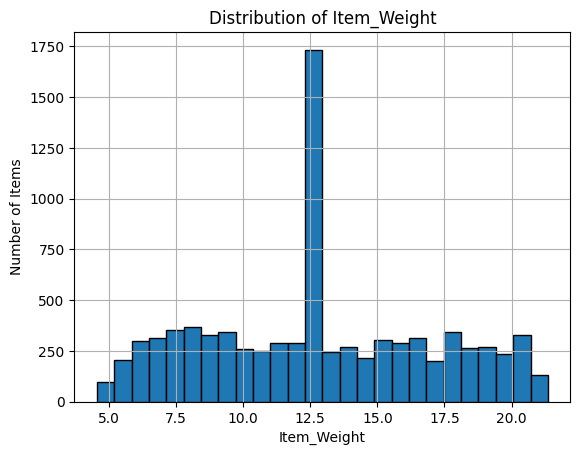

In [122]:
#Distribution of Item_Weight
ax = df['Item_Weight'].hist(bins = 'auto', edgecolor = 'black')
ax.set_title('Distribution of Item_Weight')
ax.set_xlabel('Item_Weight')
ax.set_ylabel('Number of Items');

**Interpretation:** 

Since I used **median** (`df['Item_Weight'].median()`) to fill in all of the rows that were missing the Item_Weight, I see a peak at the median value. 

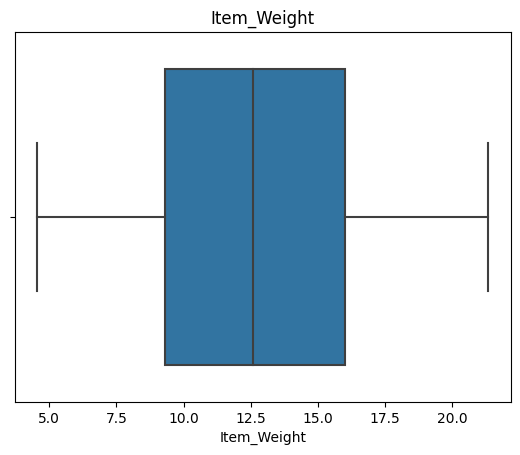

In [123]:
# Boxplot of Item_Weight
ax = sns.boxplot(x='Item_Weight', data=df)
ax.set_title("Item_Weight");

**Interpretation**: There are no outliers, and the data is not skewed.

##### **`Item_Visibility`**

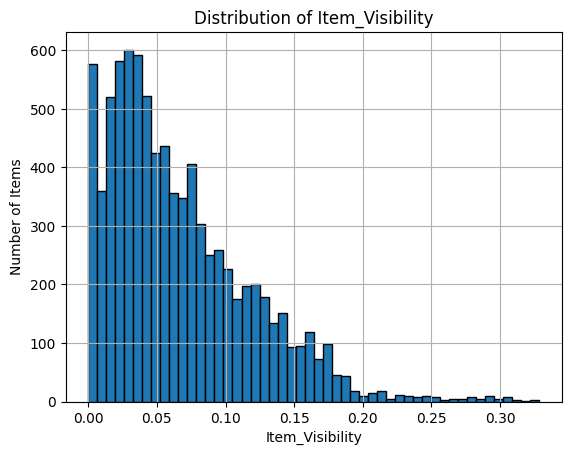

In [124]:
#Distribution of Item_Visibility
ax = df['Item_Visibility'].hist(bins = 'auto', edgecolor = 'black')
ax.set_title('Distribution of Item_Visibility')
ax.set_xlabel('Item_Visibility')
ax.set_ylabel('Number of Items');

**Interpretation**:

The data is skewed to the high side.

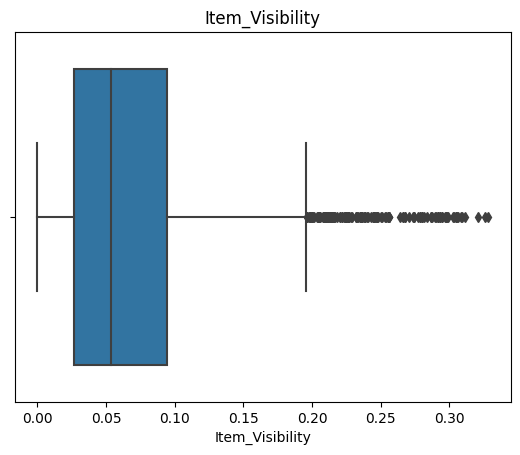

In [125]:
# Boxplot of Item_Visibility
ax = sns.boxplot(x='Item_Visibility', data=df)
ax.set_title("Item_Visibility");

**Interpretation**: There are many outliers on the high side.

##### **`Item_MRP`**

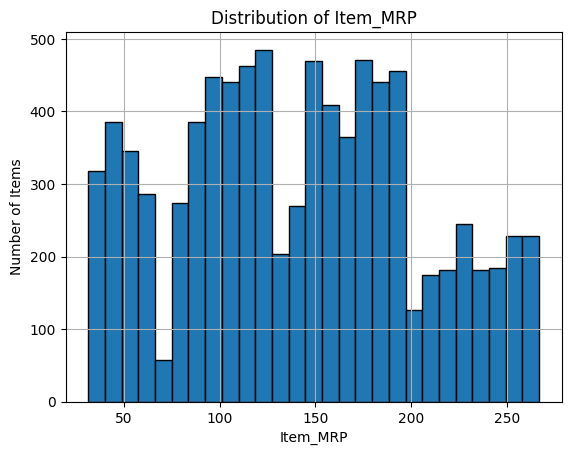

In [126]:
#Distribution of Item_MRP
ax = df['Item_MRP'].hist(bins = 'auto', edgecolor = 'black')
ax.set_title('Distribution of Item_MRP')
ax.set_xlabel('Item_MRP')
ax.set_ylabel('Number of Items');

**Interpretation**:

There are fewer items with higher MRP.

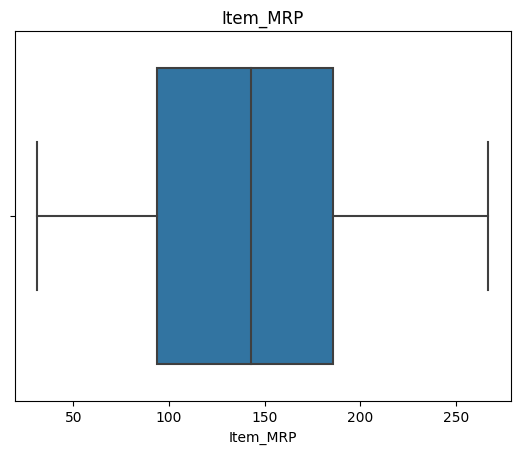

In [127]:
# Boxplot of Item_MRP
ax = sns.boxplot(x='Item_MRP', data=df)
ax.set_title("Item_MRP");

**Interpretation**: There are no outliers, and the data does not show a large skew.

##### **`Outlet_Establishment_Year`**

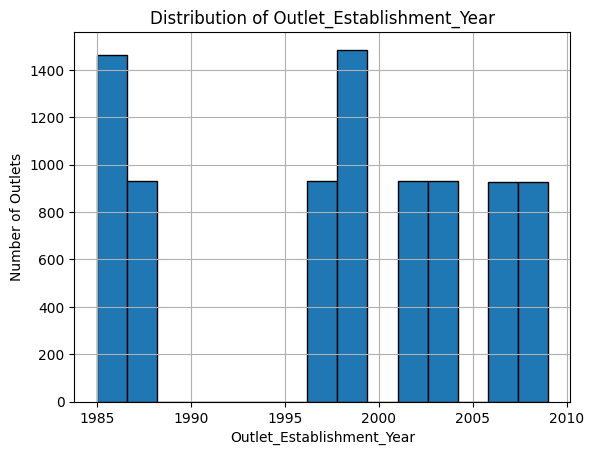

In [128]:
#Distribution of Outlet_Establishment_Year
ax = df['Outlet_Establishment_Year'].hist(bins = 'auto', edgecolor = 'black')
ax.set_title('Distribution of Outlet_Establishment_Year')
ax.set_xlabel('Outlet_Establishment_Year')
ax.set_ylabel('Number of Outlets');

**Interpretation**:

There is a gap for Outlet Establishment between late 1980s and mid 1990s.

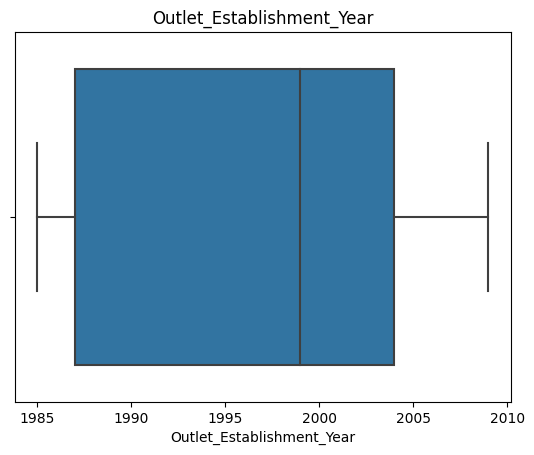

In [129]:
# Boxplot of Outlet_Establishment_Year
ax = sns.boxplot(x='Outlet_Establishment_Year', data=df)
ax.set_title("Outlet_Establishment_Year");

**Interpretation**: There are no outliers, but the data is slightly skewed.

##### **`Item_Outlet_Sales`**

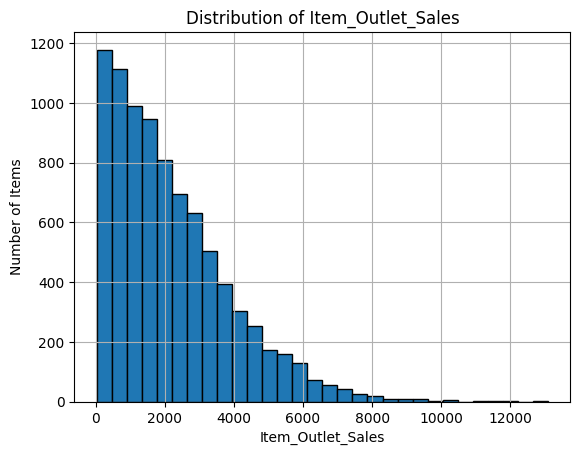

In [130]:
#Distribution of Item_Outlet_Sales
ax = df['Item_Outlet_Sales'].hist(bins = 30, edgecolor = 'black')
ax.set_title('Distribution of Item_Outlet_Sales')
ax.set_xlabel('Item_Outlet_Sales')
ax.set_ylabel('Number of Items');

**Interpretation**: 

The data is skewed to the positive side.

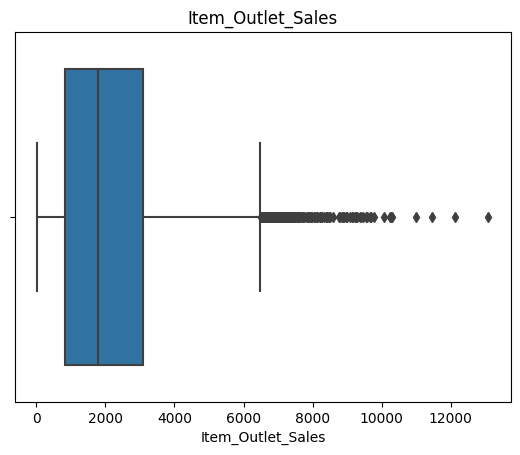

In [131]:
# Boxplot of Item_Outlet_Sales
ax = sns.boxplot(x='Item_Outlet_Sales', data=df)
ax.set_title("Item_Outlet_Sales");

**Interpretation**: There are many outliers on the high side. The data is skewed to the positive side.

> #### Categorical Columns
> * Item_Identifier
> * Item_Fat_Content
> * Item_Type
> * Outlet_Identifier
> * Outlet_Size 
> * Outlet_Location_Type
> * Outlet_Type    

In [132]:
#statistically analyze the categorical columns
df.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


##### **`Item_Fat_Content`**

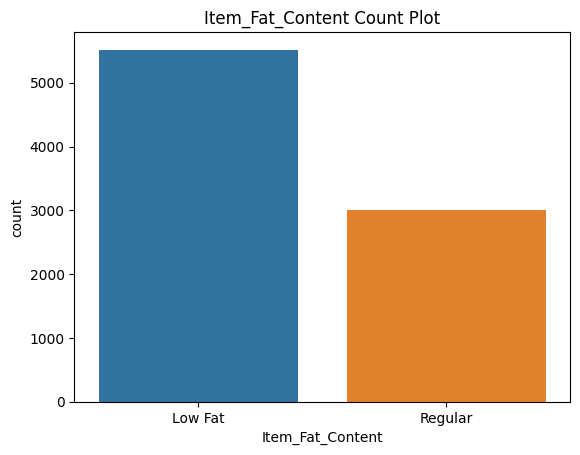

In [133]:
#Count plot of Item_Fat_Content
ax = sns.countplot(data=df, x='Item_Fat_Content')
#Set title
ax.set_title("Item_Fat_Content Count Plot");

**Interpretation**: There are more Low Fat items compared to Regular Fat items.



##### **`Item_Type`**

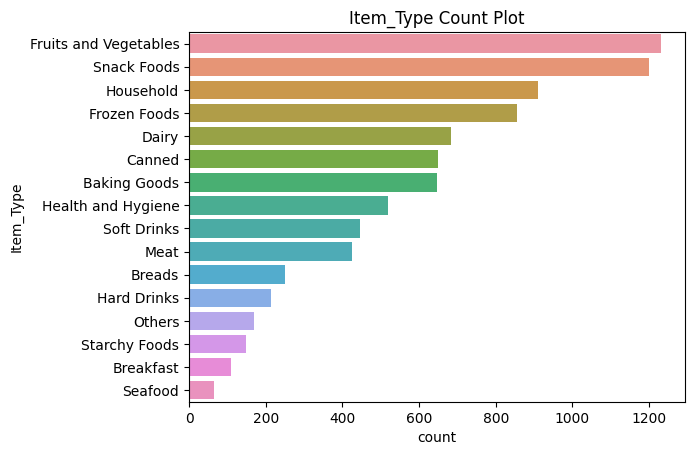

In [134]:
#Count plot of Item_Type

#Define the label order so that the value with most counts appear at the top of the horizontal graph.
label_order = df['Item_Type'].value_counts().index

#Count plot of Item_Type
ax = sns.countplot(data=df, y='Item_Type', order=label_order)

#Set title
ax.set_title("Item_Type Count Plot");

**Interpretation**: Fruits and Vegetables, and Snack Foods have high count.

##### **`Outlet_Identifier`**

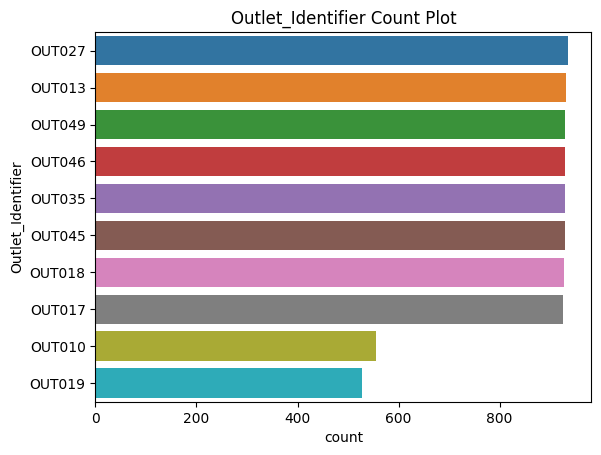

In [135]:
#Count plot of Outlet_Identifier

#Define the label order so that the value with most counts appear at the top of the horizontal graph.
label_order = df['Outlet_Identifier'].value_counts().index

#Count plot of Outlet_Identifier
ax = sns.countplot(data=df, y='Outlet_Identifier', order=label_order)

#Set title
ax.set_title("Outlet_Identifier Count Plot");

**Interpretation**: The data is from 10 different outlets and 8 of those outlets contribute about equal amount of data.

##### **`Outlet_Size`**

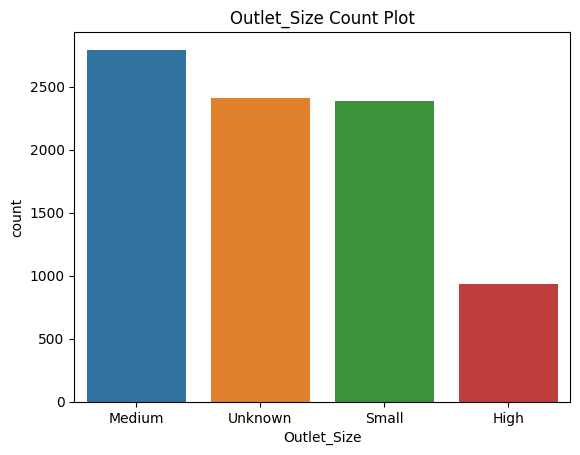

In [136]:
#Count plot of Outlet_Size

#Define the label order so that the graph is in decreasing order.
label_order = df['Outlet_Size'].value_counts().index

#Count plot of Outlet_Size
ax = sns.countplot(data=df, x='Outlet_Size', order=label_order)

#Set title
ax.set_title("Outlet_Size Count Plot");

**Interpretation**: We filled many rows with the value: "Unknown".

##### **`Outlet_Location_Type`**

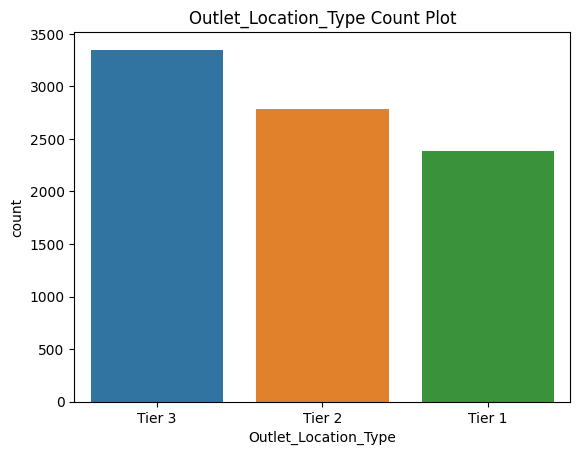

In [137]:
#Count plot of Outlet_Location_Type

#Define the label order so that the graph is in decreasing order.
label_order = df['Outlet_Location_Type'].value_counts().index

#Count plot of Outlet_Size
ax = sns.countplot(data=df, x='Outlet_Location_Type', order=label_order)

#Set title
ax.set_title("Outlet_Location_Type Count Plot");

**Interpretation**: Tier 3 Location has the highest count, then Tier 2, then Tier 1.

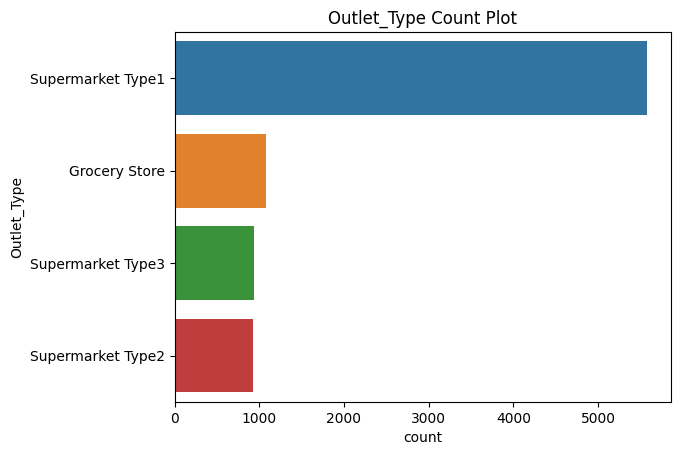

In [138]:
#Count plot of Outlet_Type

#Define the label order.
label_order = df['Outlet_Type'].value_counts().index

#Count plot of Outlet_Size
ax = sns.countplot(data=df, y='Outlet_Type', order=label_order)

#Set title
ax.set_title("Outlet_Type Count Plot");

**Interpretation**: Supermarket Type1 has the highest count and is nearly 5 times more than any of the other outlet types.

### **Multivariate Exploratory Visualization**

#### **Boxplot**

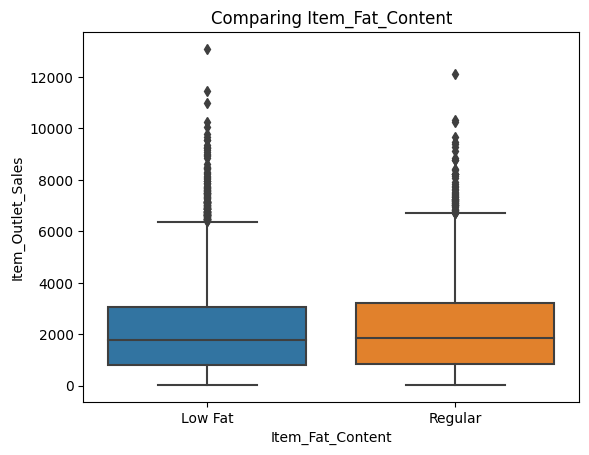

In [139]:
# Boxplot of Item_Outlet_Sales against Item_Fat_Content.
ax = sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Item_Fat_Content");

**Interpretation**: There is not a significant difference in the `Item_Outlet_Sales` depending on the `Item_Fat_Content`.

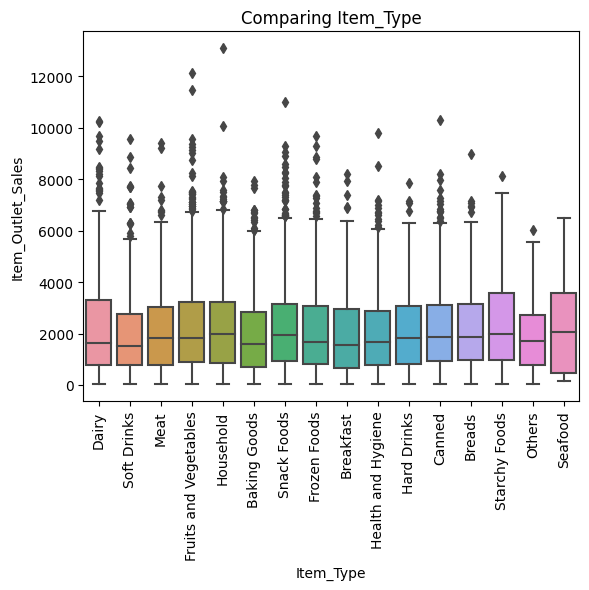

In [140]:
# Boxplot of Item_Outlet_Sales against Item_Type.
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis='x', rotation = 90)
ax.set_title("Comparing Item_Type");

**Interpretation**: `Item_Type`: "Household" has the highest outlier in terms of `Item_Outlet_Sales`.

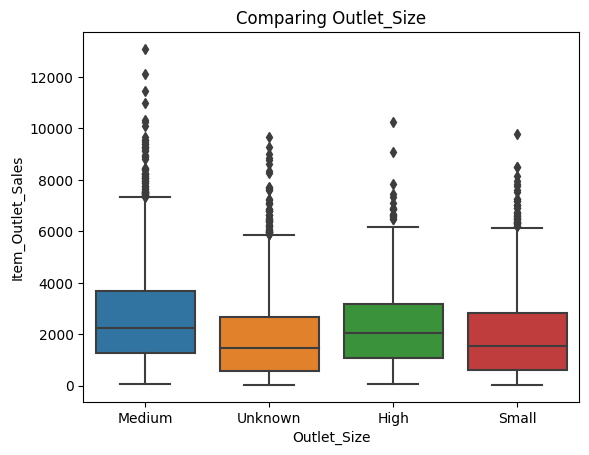

In [141]:
# Boxplot of Item_Outlet_Sales against Outlet_Size.
ax = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Outlet_Size");

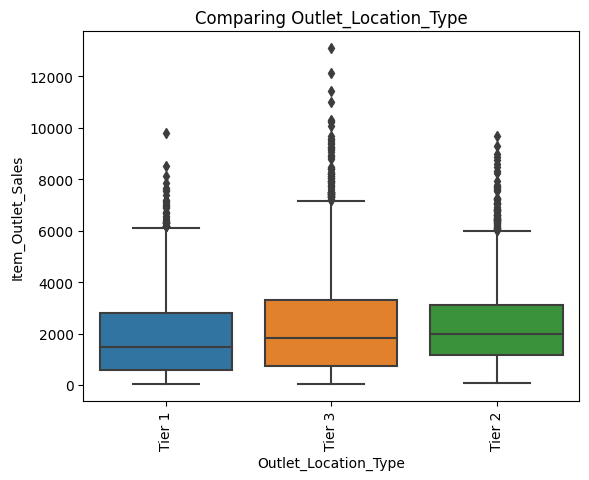

In [142]:
# Boxplot of Item_Outlet_Sales against Outlet_Location_Type.
ax = sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis='x', rotation = 90)
ax.set_title("Comparing Outlet_Location_Type");

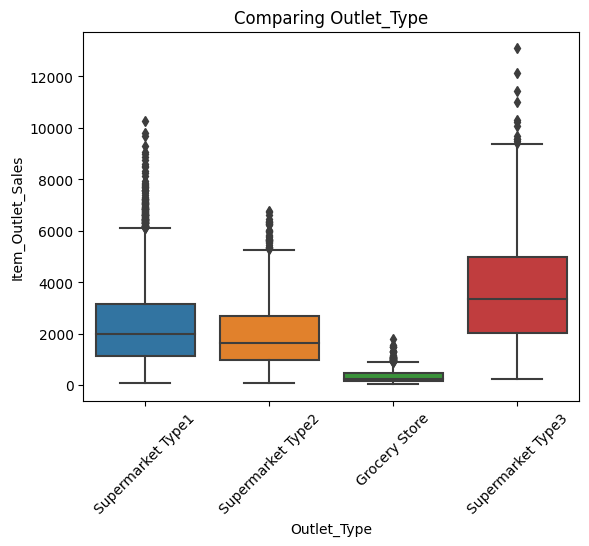

In [143]:
# Boxplot of Item_Outlet_Sales against Item_Type.
ax = sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis='x', rotation = 45)
ax.set_title("Comparing Outlet_Type");

**Interpretation**: Grocery Store does not have high `Item_Outlet_Sales` overall.

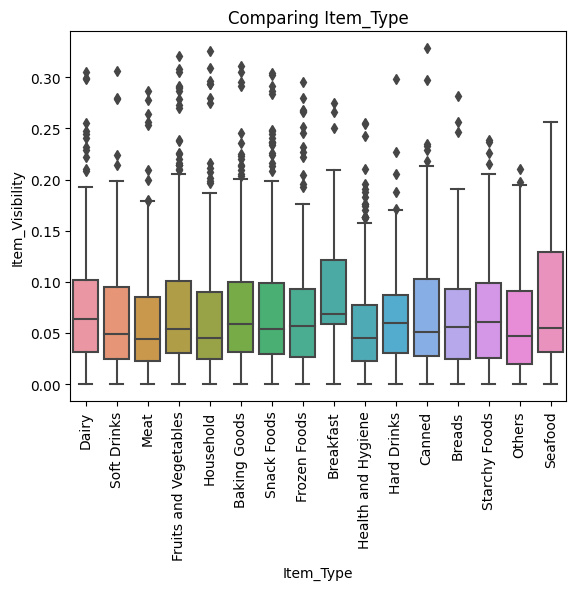

In [144]:
# Boxplot of Item_Visibility against Item_Type.
ax = sns.boxplot(x='Item_Type', y='Item_Visibility', data=df)
ax.tick_params(axis='x', rotation = 90)
ax.set_title("Comparing Item_Type");

**Interpretation**: `Item_Type`: "Breakfast" tends to have higher visibility compared to products of other `Item_Type`.

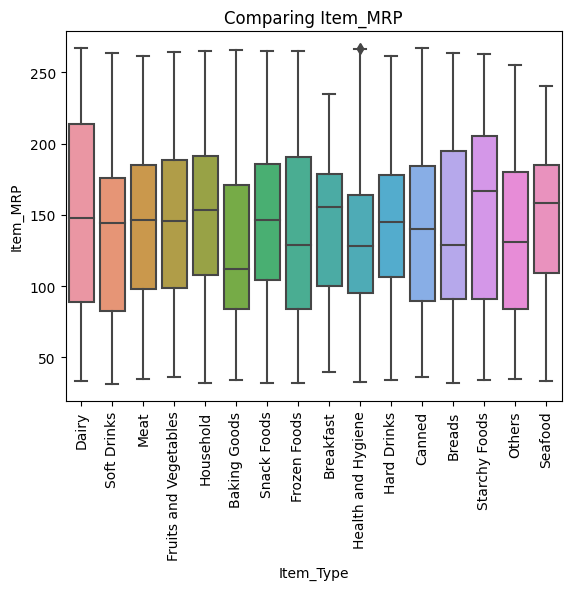

In [145]:
# Boxplot of Item_Type against Item_MRP.
ax = sns.boxplot(x='Item_Type', y='Item_MRP', data=df)
ax.tick_params(axis='x', rotation = 90)
ax.set_title("Comparing Item_MRP");

**Interpretation**: `The median `Item_MRP` is lowest for `Baking Goods` and highest for `Starchy Foods`.

#### **Heatmap**

In order to predict `Item_Outlet_Sales`, we need to see which features are correlated with `Item_Outlet_Sales` so that they can be used to predict `Item_Outlet_Sales`. I will use **Heatmap** to see the correlation between features.

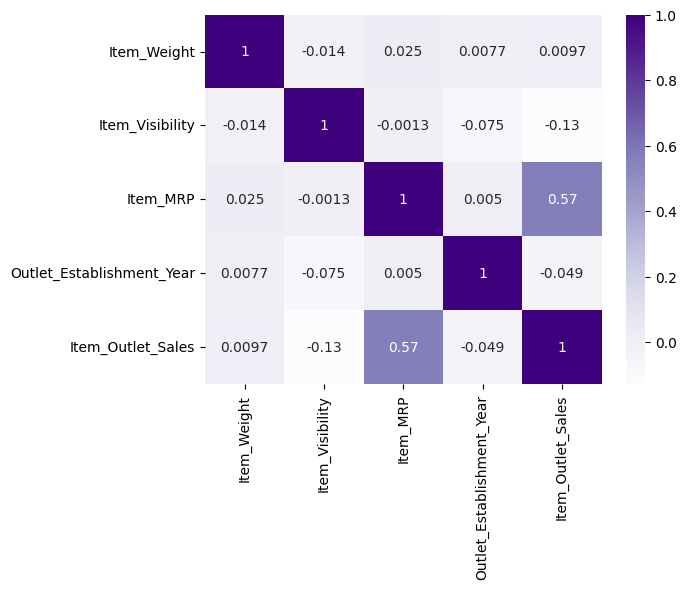

In [146]:
## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True);

There is a moderate positive correlation between `Item_MRP` and `Item_Outlet_Sales`.

## **Explanatory Data Analysis**

#### **Annotated Histogram**

In [147]:
## Create a function to plot an annotated histogram with mean and median
def plot_annotated_histogram(df, col):
    ## Saving the mean and median of the column
    mean = df[col].mean().round(2)
    median = df[col].median().round(2)
    ## Create a plot with style "bmh" 
    with plt.style.context('bmh'):
      ## Creating the Plot
      fig,ax = plt.subplots(figsize=(10,6))
      sns.histplot(data=df, x=col, ax=ax, edgecolor = 'black')
      ax.set_title(col)
    ## Annotating measures of centrality
    ax.axvline(mean, color='red',label=f'Mean: {mean}', lw=2);
    ax.axvline(median, color = 'orange',  label = f'Median: {median}', lw=2)
    
    ax.legend();
    return fig, ax

##### **`Item_MRP`**

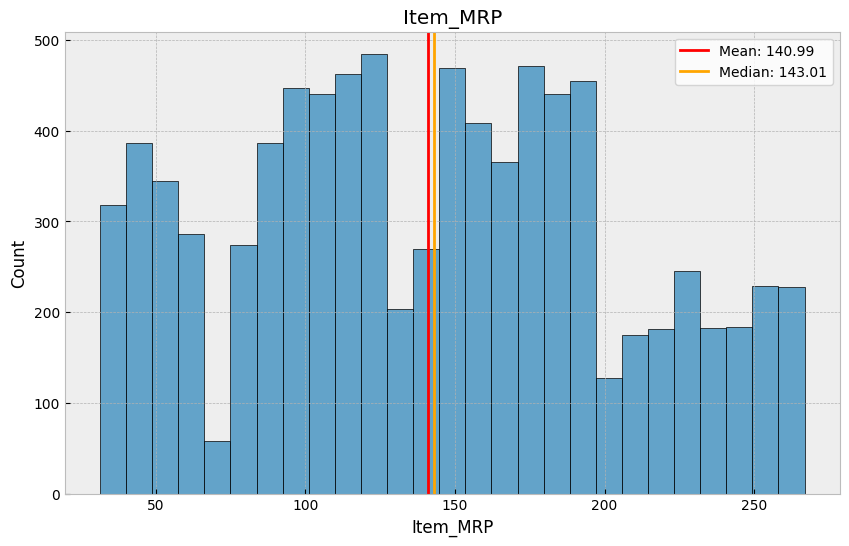

In [148]:
plot_annotated_histogram(df, 'Item_MRP');

**Interpretation**: The Mean and Median value are very close. This indicates that the data is not skewed.

In [149]:
## Create another function to plot with a different style: "seaborn-v0_8-pastel" 
def pastel_annotated_histogram(df, col):
    ## Saving the mean and median of the column
    mean = df[col].mean().round(2)
    median = df[col].median().round(2)
    ## Create a plot with style "seaborn-v0_8-pastel" 
    with plt.style.context('seaborn-v0_8-pastel'):
      ## Creating the Plot
      fig,ax = plt.subplots(figsize=(10,6))
      sns.histplot(data=df, x=col, ax=ax, edgecolor = 'black')
      ax.set_title(col)
    ## Annotating measures of centrality
    ax.axvline(mean, color='magenta',label=f'Mean: {mean}', lw=2);
    ax.axvline(median, color = 'orange',  label = f'Median: {median}', lw=2)
    
    ax.legend();
    return fig, ax

##### **`Item_Outlet_Sales`**

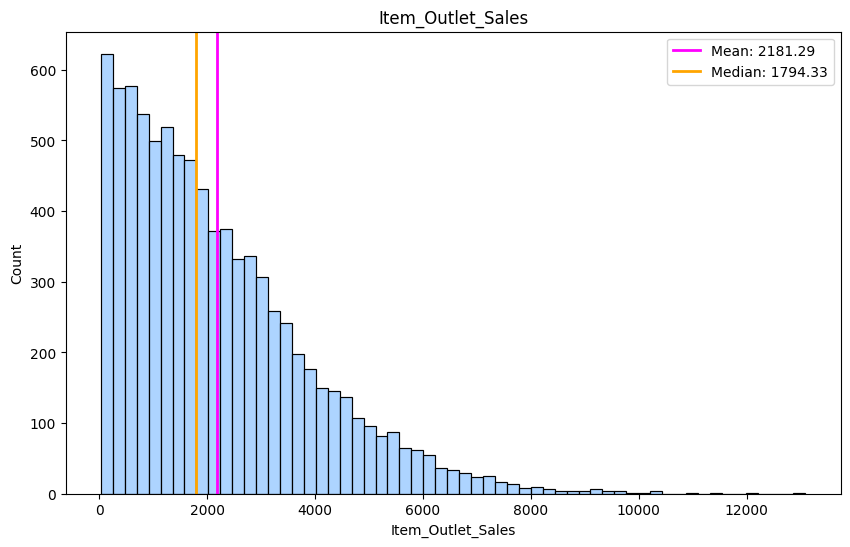

In [150]:
pastel_annotated_histogram(df, 'Item_Outlet_Sales');

**Interpretation**: The Median is less than the Mean, because the data is skewed to the high side.

#### **Regplot**

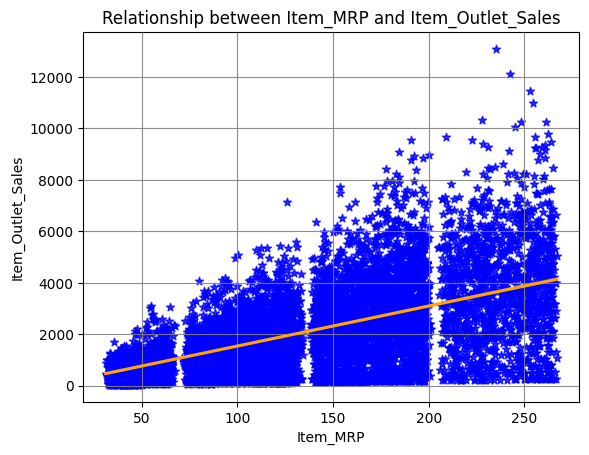

In [160]:
#Plot a regplot
ax = sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data= df, line_kws = {'color' : 'orange'}, marker="*", color = 'blue')
#Add grey grid
ax.grid(c = 'grey', 
         alpha = .9,
         linestyle = '-')
#Set title
ax.set_title('Relationship between Item_MRP and Item_Outlet_Sales');

**Interpretation**: There is a positive correlation between `Item_MRP` and `Item_Outlet_Sales`.